In [1]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import sys
from PIL import Image, ImageOps
from pathlib import Path
from keras.preprocessing.image import img_to_array

from keras.datasets import mnist
import numpy as np
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import sys
from PIL import Image, ImageOps
from pathlib import Path

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.utils import to_categorical

import tensorflow as tf

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from tensorflow.keras.regularizers import l2

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten 
from keras.layers import MaxPooling2D, Dropout

from scipy.ndimage import gaussian_filter


# Data Cleaning & Processing

In [2]:
# importing and resizing image data 
# change path to wherever your data lives on your computer
csv_path = "/Users/madelinewhitlow/Desktop/MIDS_W207/petfinder-pawpularity-score/train.csv"
image_path = '/Users/madelinewhitlow/Desktop/MIDS_W207/petfinder-pawpularity-score/train/'

def CutenessBuckets(pawpularity_score):
    if pawpularity_score <= 10:
        return 0
    elif pawpularity_score <= 20:
        return 1
    elif pawpularity_score <= 30:
        return 2
    elif pawpularity_score <= 40:
        return 3
    elif pawpularity_score <= 50:
        return 4
    elif pawpularity_score <= 60:
        return 5
    elif pawpularity_score <= 70:
        return 6
    elif pawpularity_score <= 80:
        return 7
    elif pawpularity_score <= 90:
        return 8
    elif pawpularity_score <= 100:
        return 9

    
def CutenessBuckets_2(pawpularity_score):
    if pawpularity_score <= 50:
        return 0
    elif pawpularity_score <= 100:
        return 1

    
def CutenessBuckets_3(pawpularity_score):
    if pawpularity_score <= 33:
        return 0
    elif pawpularity_score <= 66:
        return 1
    elif pawpularity_score <= 100:
        return 2

def CutenessBuckets_4(pawpularity_score):
    if pawpularity_score <= 25:
        return 0
    elif pawpularity_score <= 50:
        return 1
    elif pawpularity_score <= 75:
        return 2
    elif pawpularity_score <= 100:
        return 3
    
def CutenessBuckets_5(pawpularity_score):
    if pawpularity_score <= 20:
        return 0
    elif pawpularity_score <= 40:
        return 1
    elif pawpularity_score <= 60:
        return 2
    elif pawpularity_score <= 80:
        return 3
    elif pawpularity_score <= 100:
        return 4
    
def CutenessBuckets_7(pawpularity_score):
    if pawpularity_score <= 15:
        return 0
    elif pawpularity_score <= 30:
        return 1
    elif pawpularity_score <= 45:
        return 2
    elif pawpularity_score <= 60:
        return 3
    elif pawpularity_score <= 75:
        return 4
    elif pawpularity_score <= 90:
        return 5
    elif pawpularity_score <= 100:
        return 6

    
def CutenessBuckets_2_diff_breakpoint(pawpularity_score):
    if pawpularity_score <= 75:
        return 0
    elif pawpularity_score <= 100:
        return 1

def CleanandProcessData(csv_path, image_path, image_resize):

    # imnporting csv with image ids and pawpularity scores
    df = pd.read_csv(csv_path)

    # creating path to image using the id in the data frame we've created
    df['path'] = image_path + df['Id'] + '.jpg'
    df['img'] = df['path'].apply(lambda x: Image.open(x).convert("RGB").resize((image_resize,image_resize)))
    
    df['cuteness_bin10'] = df['Pawpularity'].apply(CutenessBuckets)
    df['cuteness_bin2'] = df['Pawpularity'].apply(CutenessBuckets_2)
    df['cuteness_bin3'] = df['Pawpularity'].apply(CutenessBuckets_3)
    df['cuteness_bin4'] = df['Pawpularity'].apply(CutenessBuckets_4)
    df['cuteness_bin5'] = df['Pawpularity'].apply(CutenessBuckets_5)
    df['cuteness_bin7'] = df['Pawpularity'].apply(CutenessBuckets_7)
    df['cuteness_bin2diff'] = df['Pawpularity'].apply(CutenessBuckets_2_diff_breakpoint)
    
    df['img_array'] = df['img'].apply(lambda x: img_to_array(x)/255)

    labels_raw=[]
    labels_bin2 = []
    #labels_bin2diff = []
    #labels_bin3 = []
    #labels_bin4 = []
    #labels_bin5 = []
    #labels_bin7 = []
    labels_bin10 = []
    tags = []
    imgArr=[]

    for ind in df.index:
        img = df.img_array[ind]
        imgArr.append(img)
        labels_raw.append(df['Pawpularity'][ind])
        labels_bin2.append(df['cuteness_bin2'][ind])
        #labels_bin2diff.append(df['cuteness_bin2diff'][ind])
        #labels_bin3.append(df['cuteness_bin3'][ind])
        #labels_bin4.append(df['cuteness_bin4'][ind])
        #labels_bin5.append(df['cuteness_bin5'][ind])
        #labels_bin7.append(df['cuteness_bin7'][ind])
        labels_bin10.append(df['cuteness_bin10'][ind])

    labels_raw = np.array(labels_raw)
    labels_bin2 = np.array(labels_bin2)
    #labels_bin2diff = np.array(labels_bin2diff)
    #labels_bin3 = np.array(labels_bin3)
    #labels_bin4 = np.array(labels_bin4)
    #labels_bin5 = np.array(labels_bin5)
    #labels_bin7 = np.array(labels_bin7)
    labels_bin10 = np.array(labels_bin10)
    
    
    
    
    X_train=np.array(imgArr, dtype=float)
    print('Training Shape:',X_train.shape)
    print('Labels Shape;', labels_raw.shape)
    return X_train, labels_raw, labels_bin2, labels_bin10

X_train, labels_raw, labels_bin2, labels_bin10 = CleanandProcessData(csv_path, image_path, 50)

Training Shape: (9912, 50, 50, 3)
Labels Shape; (9912,)


In [16]:
# Shuffling data and separating into train, test and dev sets
shuffle = np.random.permutation(np.arange(X_train.shape[0]))

X_train, labels_raw, labels_bin2, labels_bin10 = X_train[shuffle], labels_raw[shuffle], labels_bin2[shuffle],labels_bin10[shuffle]

print('data shape: ', X_train.shape)
print('pawpularity label shape:', labels_raw.shape)
print('2 bin label shape:', labels_bin2.shape)
print('10 bin label shape:', labels_bin10.shape)


# Set some variables to hold test, dev, and training data.
train_data, train_labels_raw, train_labels_bin10, train_labels_bin2 = X_train[:7921], labels_raw[:7921], labels_bin10[:7921], labels_bin2[:7921]
test_data, test_labels_raw, test_labels_bin10, test_labels_bin2 = X_train[8916:], labels_raw[8916:], labels_bin10[8916:], labels_bin2[8916:]
dev_data, dev_labels_raw, dev_labels_bin10, dev_labels_bin2 = X_train[7920:8916], labels_raw[7920:8916], labels_bin10[7920:8916], labels_bin2[7920:8916]

# raw labels (ie original pawpularity score)
test_labels_category = to_categorical(test_labels_raw)
train_labels_category = to_categorical(train_labels_raw)
dev_labels_category = to_categorical(dev_labels_raw)

# bucketed labels 
test_labels_bins_category2 = to_categorical(test_labels_bin2)
train_labels_bins_category2 = to_categorical(train_labels_bin2)
dev_labels_bins_category2 = to_categorical(dev_labels_bin2)

test_labels_bins_category10 = to_categorical(test_labels_bin10)
train_labels_bins_category10 = to_categorical(train_labels_bin10)
dev_labels_bins_category10 = to_categorical(dev_labels_bin10)


# blurred image data (optional use)
blurred_train = gaussian_filter(train_data, sigma=1)
blurred_test = gaussian_filter(test_data, sigma = 1)

data shape:  (9912, 50, 50, 3)
pawpularity label shape: (9912,)
2 bin label shape: (9912,)
10 bin label shape: (9912,)


# First CNN Model 

In [7]:
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
possible_outcomes = 101
# first model attempt (using raw pawpularity scores)
# switch out activation to 'sigmoid'
# try different pixel amounts (100x100) (20x20) etc
#try binary crosstentropy vs categorical 
#adjust epochs


model = Sequential()#add model layers
model.add(Conv2D(32, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
# add second convolutional layer with 20 filters
model.add(Conv2D(64, (5, 5), activation='relu'))
    
# add 2D pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
    
# flatten data
model.add(Flatten())
    
# add a dense all-to-all relu layer
model.add(Dense(1024, activation='relu'))
    
# apply dropout with rate 0.5
model.add(Dropout(0.5))
    
# soft-max layer
model.add(Dense(possible_outcomes, activation='softmax'))
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model

print('-'*10, 'CNN Model 1 with all Paw scores', '-'*10)
model.fit(train_data,train_labels_category, validation_data=(test_data, test_labels_category), epochs=3)
# evaluate the model
score = model.evaluate(test_data, test_labels_category, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

---------- CNN Model 1 with all Paw scores ----------
Epoch 1/3
248/248 [==============================] - 33s 131ms/step - loss: 4.2601 - accuracy: 0.0307 - val_loss: 4.2233 - val_accuracy: 0.0231
Epoch 2/3
248/248 [==============================] - 37s 149ms/step - loss: 4.2236 - accuracy: 0.0271 - val_loss: 4.2178 - val_accuracy: 0.0311
Epoch 3/3
32/32 [==============================] - 1s 35ms/step - loss: 4.2233 - accuracy: 0.0341

Test loss: 4.223291397094727
Test accuracy: 0.03413654491305351


# Same Model but using 10 category buckets for scores

In [8]:
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
possible_outcomes = 10
# first model attempt (using raw pawpularity scores)
# switch out activation to 'sigmoid'
# try different pixel amounts (100x100) (20x20) etc
#try binary crosstentropy vs categorical 
#adjust epochs


model = Sequential()#add model layers
model.add(Conv2D(32, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
# add second convolutional layer with 20 filters
model.add(Conv2D(64, (5, 5), activation='relu'))
    
# add 2D pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
    
# flatten data
model.add(Flatten())
    
# add a dense all-to-all relu layer
model.add(Dense(1024, activation='relu'))
    
# apply dropout with rate 0.5
model.add(Dropout(0.5))
    
# soft-max layer
model.add(Dense(possible_outcomes, activation='softmax'))
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model

print('-'*10, 'CNN Model 1 with all Paw scores', '-'*10)
model.fit(train_data,train_labels_bins_category10, validation_data=(test_data, test_labels_bins_category10), epochs=3)
# evaluate the model
score = model.evaluate(test_data, test_labels_bins_category10, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

---------- CNN Model 1 with all Paw scores ----------
Epoch 1/3
248/248 [==============================] - 34s 134ms/step - loss: 1.9940 - accuracy: 0.2671 - val_loss: 1.9525 - val_accuracy: 0.2681
Epoch 2/3
248/248 [==============================] - 36s 146ms/step - loss: 1.9762 - accuracy: 0.2784 - val_loss: 1.9583 - val_accuracy: 0.2681
Epoch 3/3
32/32 [==============================] - 1s 36ms/step - loss: 1.9676 - accuracy: 0.2691

Test loss: 1.9675593376159668
Test accuracy: 0.26907631754875183


# Same Model but using 2 category buckets for scores

In [17]:
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
possible_outcomes = 3
# first model attempt (using raw pawpularity scores)
# switch out activation to 'sigmoid'
# try different pixel amounts (100x100) (20x20) etc
#try binary crosstentropy vs categorical 
#adjust epochs


model = Sequential()#add model layers
model.add(Conv2D(32, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
# add second convolutional layer with 20 filters
model.add(Conv2D(64, (5, 5), activation='relu'))
    
# add 2D pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
    
# flatten data
model.add(Flatten())
    
# add a dense all-to-all relu layer
model.add(Dense(1024, activation='relu'))
    
# apply dropout with rate 0.5
model.add(Dropout(0.5))
    
# soft-max layer
model.add(Dense(possible_outcomes, activation='softmax'))
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model

print('-'*10, 'CNN Model 1 with all Paw scores', '-'*10)
model.fit(train_data,train_labels_bins_category2, validation_data=(test_data, test_labels_bins_category2), epochs=3)
# evaluate the model
score = model.evaluate(test_data, test_labels_bins_category2, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

---------- CNN Model 1 with all Paw scores ----------
Epoch 1/3
248/248 [==============================] - 31s 124ms/step - loss: 0.9552 - accuracy: 0.4970 - val_loss: 0.9545 - val_accuracy: 0.4869
Epoch 2/3
248/248 [==============================] - 32s 131ms/step - loss: 0.9422 - accuracy: 0.5095 - val_loss: 0.9585 - val_accuracy: 0.4869
Epoch 3/3
32/32 [==============================] - 1s 29ms/step - loss: 0.9540 - accuracy: 0.4859

Test loss: 0.9540382027626038
Test accuracy: 0.4859437644481659


# Second CNN Model - Using raw paw scores

In [18]:
# model from kaggle page 
# https://www.kaggle.com/alexteboul/tutorial-part-3-cnn-image-modeling-1

# this accuracy seems ot be higher we could mess around with different filters/padding etc
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
inputs = tf.keras.Input(shape=shape)

#start off with x just being those inputs
x = inputs

x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (7,7), strides = (2,2), padding='valid', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)


x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs = inputs, outputs = output)

model.compile(
    loss = 'mse', 
    optimizer = 'Adam', 
    metrics = [tf.keras.metrics.RootMeanSquaredError(name="rmse"), "mae", "mape"])

data_augmentation = ImageDataGenerator(
    rotation_range = 15, 
    zoom_range = 0.15,
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.1,
    horizontal_flip = True, 
    fill_mode = "nearest")
history = model.fit(
    data_augmentation.flow(train_data,train_labels_category,batch_size=32),
    validation_data = (test_data, test_labels_category),
    steps_per_epoch = len(train_data) // 32,
    epochs = 3
)
score = model.evaluate(test_data, test_labels_category, verbose=1)
print('Test accuracy:', score[1])

Epoch 1/3
247/247 [==============================] - 26s 100ms/step - loss: 0.6063 - rmse: 0.6038 - mae: 0.2782 - mape: 267783744.0000 - val_loss: 0.2596 - val_rmse: 0.1372 - val_mae: 0.0765 - val_mape: 66962764.0000
Epoch 2/3
247/247 [==============================] - 25s 103ms/step - loss: 0.2511 - rmse: 0.1080 - mae: 0.0357 - mape: 25844630.0000 - val_loss: 0.2484 - val_rmse: 0.1025 - val_mae: 0.0279 - val_mape: 18156696.0000
Epoch 3/3
32/32 [==============================] - 0s 15ms/step - loss: 0.2444 - rmse: 0.1000 - mae: 0.0226 - mape: 12775931.0000
Test accuracy: 0.10004880279302597


# Second CNN Model - Using 10 bucket paw scores

In [19]:
# model from kaggle page 
# https://www.kaggle.com/alexteboul/tutorial-part-3-cnn-image-modeling-1

# this accuracy seems ot be higher we could mess around with different filters/padding etc
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
inputs = tf.keras.Input(shape=shape)

#start off with x just being those inputs
x = inputs

x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (7,7), strides = (2,2), padding='valid', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)


x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs = inputs, outputs = output)

model.compile(
    loss = 'mse', 
    optimizer = 'Adam', 
    metrics = [tf.keras.metrics.RootMeanSquaredError(name="rmse"), "mae", "mape"])

data_augmentation = ImageDataGenerator(
    rotation_range = 15, 
    zoom_range = 0.15,
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.1,
    horizontal_flip = True, 
    fill_mode = "nearest")
history = model.fit(
    data_augmentation.flow(train_data,train_labels_bins_category10,batch_size=32),
    validation_data = (test_data, test_labels_bins_category10),
    steps_per_epoch = len(train_data) // 32,
    epochs = 3
)
score = model.evaluate(test_data, test_labels_bins_category10, verbose=1)
print('Test accuracy:', score[1])

Epoch 1/3
247/247 [==============================] - 31s 120ms/step - loss: 0.6942 - rmse: 0.6725 - mae: 0.3668 - mape: 268993664.0000 - val_loss: 0.3478 - val_rmse: 0.3276 - val_mae: 0.2388 - val_mape: 155548880.0000
Epoch 2/3
247/247 [==============================] - 26s 107ms/step - loss: 0.3318 - rmse: 0.3053 - mae: 0.1743 - mape: 83283568.0000 - val_loss: 0.3281 - val_rmse: 0.3023 - val_mae: 0.1809 - val_mape: 91032728.0000
Epoch 3/3
32/32 [==============================] - 1s 17ms/step - loss: 0.3235 - rmse: 0.3018 - mae: 0.1804 - mape: 90412488.0000
Test accuracy: 0.30182066559791565


# Second CNN Model - Using 2 bucket paw scores

In [20]:
# model from kaggle page 
# https://www.kaggle.com/alexteboul/tutorial-part-3-cnn-image-modeling-1

# this accuracy seems ot be higher we could mess around with different filters/padding etc
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
inputs = tf.keras.Input(shape=shape)

#start off with x just being those inputs
x = inputs

x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (7,7), strides = (2,2), padding='valid', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)


x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs = inputs, outputs = output)

model.compile(
    loss = 'mse', 
    optimizer = 'Adam', 
    metrics = [tf.keras.metrics.RootMeanSquaredError(name="rmse"), "mae", "mape"])

data_augmentation = ImageDataGenerator(
    rotation_range = 15, 
    zoom_range = 0.15,
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.1,
    horizontal_flip = True, 
    fill_mode = "nearest")
history = model.fit(
    data_augmentation.flow(train_data,train_labels_bins_category2,batch_size=32),
    validation_data = (test_data, test_labels_bins_category2),
    steps_per_epoch = len(train_data) // 32,
    epochs = 3
)
score = model.evaluate(test_data, test_labels_bins_category2, verbose=1)
print('Test accuracy:', score[1])

Epoch 1/3
247/247 [==============================] - 28s 105ms/step - loss: 0.9301 - rmse: 0.8299 - mae: 0.5873 - mape: 321073408.0000 - val_loss: 0.4793 - val_rmse: 0.4883 - val_mae: 0.4580 - val_mape: 249249360.0000
Epoch 2/3
247/247 [==============================] - 26s 107ms/step - loss: 0.4707 - rmse: 0.4805 - mae: 0.4398 - mape: 212812592.0000 - val_loss: 0.4639 - val_rmse: 0.4748 - val_mae: 0.4416 - val_mape: 216561808.0000
Epoch 3/3
32/32 [==============================] - 1s 17ms/step - loss: 0.4603 - rmse: 0.4742 - mae: 0.4345 - mape: 202430912.0000
Test accuracy: 0.4741618037223816


# Trying other models (Naive Bayes & KNN) - raw paw scores

In [21]:
# Other model attempts:
# have to reshape the data to input it into a different model
train_size = train_data.shape[0]
train_shape = train_data.shape[1]*train_data.shape[2]*train_data.shape[3]

test_size = test_data.shape[0]
test_shape = test_data.shape[1]*test_data.shape[2]*test_data.shape[3]

train_data_temp = train_data.reshape(train_size,train_shape)
test_data_temp = test_data.reshape(test_size,test_shape)
print('-'*10, ' K Nearest Neighbor ', '-'*10)
for k in [1,2,3,5,7]:
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    knnmodel.fit(train_data_temp, train_labels_raw)
    test_predicted_labels = knnmodel.predict(test_data_temp)
    print("accuracy with k=", k, " : ", metrics.accuracy_score(test_labels_raw, test_predicted_labels))


print('-'*10, 'Naive Bayes ', '-'*10)
naive_bayes_model1 = BernoulliNB()
naive_bayes_model1.fit(train_data_temp, train_labels_raw)
print ('Bernoulli Model accuracy: %3.4f' %naive_bayes_model1.score(test_data_temp, test_labels_raw))

----------  K Nearest Neighbor  ----------
accuracy with k= 1  :  0.01104417670682731
accuracy with k= 2  :  0.014056224899598393
accuracy with k= 3  :  0.019076305220883535
accuracy with k= 5  :  0.01706827309236948
accuracy with k= 7  :  0.018072289156626505
---------- Naive Bayes  ----------
Bernoulli Model accuracy: 0.0271


# Trying other models (Naive Bayes & KNN) - bin 10 scores


In [22]:
print('-'*10, ' K Nearest Neighbor ', '-'*10)
for k in [1,2,3,5,7,8,9,10]:
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    knnmodel.fit(train_data_temp, train_labels_bin10)
    test_predicted_labels = knnmodel.predict(test_data_temp)
    print("accuracy with k=", k, " : ", metrics.accuracy_score(test_labels_bin10, test_predicted_labels))

print('-'*10, 'Naive Bayes ', '-'*10)
naive_bayes_model1 = BernoulliNB()
naive_bayes_model1.fit(train_data_temp, train_labels_bin10)
print ('Bernoulli Model accuracy: %3.4f' %naive_bayes_model1.score(test_data_temp, test_labels_bin10))

----------  K Nearest Neighbor  ----------
accuracy with k= 1  :  0.16967871485943775
accuracy with k= 2  :  0.18373493975903615
accuracy with k= 3  :  0.19477911646586346
accuracy with k= 5  :  0.20281124497991967
accuracy with k= 7  :  0.22590361445783133
accuracy with k= 8  :  0.20883534136546184
accuracy with k= 9  :  0.21285140562248997
accuracy with k= 10  :  0.22389558232931728
---------- Naive Bayes  ----------
Bernoulli Model accuracy: 0.1315


# Trying other models (Naive Bayes & KNN) - bin 2 scores


In [23]:
print('-'*10, ' K Nearest Neighbor ', '-'*10)
for k in [1,2,3,5,7,8,9,10]:
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    knnmodel.fit(train_data_temp, train_labels_bin2)
    test_predicted_labels = knnmodel.predict(test_data_temp)
    print("accuracy with k=", k, " : ", metrics.accuracy_score(test_labels_bin2, test_predicted_labels))

print('-'*10, 'Naive Bayes ', '-'*10)
naive_bayes_model1 = BernoulliNB()
naive_bayes_model1.fit(train_data_temp, train_labels_bin2)
print ('Bernoulli Model accuracy: %3.4f' %naive_bayes_model1.score(test_data_temp, test_labels_bin2))

----------  K Nearest Neighbor  ----------
accuracy with k= 1  :  0.40963855421686746
accuracy with k= 2  :  0.44779116465863456
accuracy with k= 3  :  0.4367469879518072
accuracy with k= 5  :  0.44879518072289154
accuracy with k= 7  :  0.4267068273092369
accuracy with k= 8  :  0.4347389558232932
accuracy with k= 9  :  0.44477911646586343
accuracy with k= 10  :  0.42971887550200805
---------- Naive Bayes  ----------
Bernoulli Model accuracy: 0.4538


In [24]:

def CutenessBuckets_2(pawpularity_score):
    if pawpularity_score <= 50:
        return 0
    elif pawpularity_score <= 100:
        return 1

    
def CutenessBuckets_3(pawpularity_score):
    if pawpularity_score <= 33:
        return 0
    elif pawpularity_score <= 66:
        return 1
    elif pawpularity_score <= 100:
        return 2

def CutenessBuckets_4(pawpularity_score):
    if pawpularity_score <= 25:
        return 0
    elif pawpularity_score <= 50:
        return 1
    elif pawpularity_score <= 75:
        return 2
    elif pawpularity_score <= 100:
        return 3
    
def CutenessBuckets_5(pawpularity_score):
    if pawpularity_score <= 20:
        return 0
    elif pawpularity_score <= 40:
        return 1
    elif pawpularity_score <= 60:
        return 2
    elif pawpularity_score <= 80:
        return 3
    elif pawpularity_score <= 100:
        return 4
    
def CutenessBuckets_7(pawpularity_score):
    if pawpularity_score <= 15:
        return 0
    elif pawpularity_score <= 30:
        return 1
    elif pawpularity_score <= 45:
        return 2
    elif pawpularity_score <= 60:
        return 3
    elif pawpularity_score <= 75:
        return 4
    elif pawpularity_score <= 90:
        return 5
    elif pawpularity_score <= 100:
        return 6

    
def CutenessBuckets_2_diff_breakpoint(pawpularity_score):
    if pawpularity_score <= 75:
        return 0
    elif pawpularity_score <= 100:
        return 1

df = pd.read_csv("/Users/madelinewhitlow/Desktop/MIDS_W207/petfinder-pawpularity-score/train.csv")
df['cuteness_bin10'] = df['Pawpularity'].apply(CutenessBuckets)
df['cuteness_bin2'] = df['Pawpularity'].apply(CutenessBuckets_2)
df['cuteness_bin3'] = df['Pawpularity'].apply(CutenessBuckets_3)
df['cuteness_bin4'] = df['Pawpularity'].apply(CutenessBuckets_4)
df['cuteness_bin5'] = df['Pawpularity'].apply(CutenessBuckets_5)
df['cuteness_bin7'] = df['Pawpularity'].apply(CutenessBuckets_7)
df['CutenessBuckets_2_diff_breakpoint'] = df['Pawpularity'].apply(CutenessBuckets_2_diff_breakpoint)

labels_raw10 = np.array(df['cuteness_bin10'])
labels_raw2 = np.array(df['cuteness_bin2'])
labels_raw3 = np.array(df['cuteness_bin3'])
labels_raw4 = np.array(df['cuteness_bin4'])
labels_raw5 = np.array(df['cuteness_bin5'])
labels_raw7 = np.array(df['cuteness_bin7'])
labels_raw2_diff = np.array(df['CutenessBuckets_2_diff_breakpoint'])

train_labels_raw10 =  labels_raw10[:7921]
test_labels_raw10 = labels_raw10[8916:]

train_labels_raw2 =  labels_raw2[:7921]
test_labels_raw2 = labels_raw2[8916:]

train_labels_raw3 =  labels_raw3[:7921]
test_labels_raw3 = labels_raw3[8916:]

train_labels_raw4 =  labels_raw4[:7921]
test_labels_raw4 = labels_raw4[8916:]

train_labels_raw5 =  labels_raw5[:7921]
test_labels_raw5 = labels_raw5[8916:]

train_labels_raw7 =  labels_raw7[:7921]
test_labels_raw7 = labels_raw7[8916:]

train_labels_raw2diff =  labels_raw2_diff[:7921]
test_labels_raw2diff = labels_raw2_diff[8916:]

In [79]:
train_labels_list = [train_labels_raw2diff, 
                     train_labels_raw2, 
                     train_labels_raw3, 
                     train_labels_raw4,
                     train_labels_raw5,
                     train_labels_raw7,
                     train_labels_raw10]
test_labels_list = [test_labels_raw2diff, 
                    test_labels_raw2, 
                    test_labels_raw3, 
                    test_labels_raw4,
                    test_labels_raw5,
                    test_labels_raw7,
                    test_labels_raw10
                    ]
bucket_list = ['2_diff','2','3','4','5','7','10']

stored_buckets = []
stored_accuracies = []
stored_k = []
for k in [1,2,3,5,7,10,20,]:
    for i in range(len(train_labels_list)):
        knnmodel = KNeighborsClassifier(n_neighbors=k)
        knnmodel.fit(train_data_temp, train_labels_list[i])
        test_predicted_labels = knnmodel.predict(test_data_temp)
        stored_buckets.append(bucket_list[i])
        stored_accuracies.append(metrics.accuracy_score(test_labels_list[i], test_predicted_labels))
        stored_k.append(k)
        print("bucket size = :" ,bucket_list[i])
        print("accuracy with k=", k, " : ", metrics.accuracy_score(test_labels_list[i], test_predicted_labels))

bucket size = : 2_diff
accuracy with k= 1  :  0.8875502008032129
bucket size = : 2
accuracy with k= 1  :  0.7018072289156626
bucket size = : 3
accuracy with k= 1  :  0.4407630522088353
bucket size = : 4
accuracy with k= 1  :  0.392570281124498
bucket size = : 5
accuracy with k= 1  :  0.35843373493975905
bucket size = : 7
accuracy with k= 1  :  0.23493975903614459
bucket size = : 10
accuracy with k= 1  :  0.15963855421686746
bucket size = : 2_diff
accuracy with k= 2  :  0.9307228915662651
bucket size = : 2
accuracy with k= 2  :  0.7710843373493976
bucket size = : 3
accuracy with k= 2  :  0.4979919678714859
bucket size = : 4
accuracy with k= 2  :  0.3885542168674699
bucket size = : 5
accuracy with k= 2  :  0.39759036144578314
bucket size = : 7
accuracy with k= 2  :  0.2740963855421687
bucket size = : 10
accuracy with k= 2  :  0.18473895582329317
bucket size = : 2_diff
accuracy with k= 3  :  0.9226907630522089
bucket size = : 2
accuracy with k= 3  :  0.7319277108433735
bucket size = : 3
a

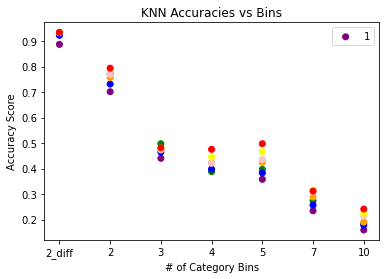

In [80]:

accuracies_df = pd.DataFrame({'stored_buckets':stored_buckets, 'stored_accuracies':stored_accuracies, 'stored_k':stored_k})
colors = {1: 'purple', 2: 'green', 3: 'blue', 5: 'orange', 7: 'pink', 10: 'yellow', 20: 'red'}

plt.scatter(accuracies_df.stored_buckets, accuracies_df.stored_accuracies, c=accuracies_df.stored_k.map(colors))
plt.legend(colors,)
plt.title("KNN Accuracies vs Bins")
plt.xlabel("# of Category Bins")
plt.ylabel("Accuracy Score")
plt.legend(accuracies_df.stored_k,)

In [82]:
print(accuracies_df.sort_values(['stored_accuracies'], ascending=False).head(10))

   stored_buckets  stored_accuracies  stored_k
42         2_diff           0.934739        20
35         2_diff           0.934739        10
28         2_diff           0.934739         7
21         2_diff           0.933735         5
7          2_diff           0.930723         2
14         2_diff           0.922691         3
0          2_diff           0.887550         1
43              2           0.794177        20
36              2           0.792169        10
8               2           0.771084         2


In [ ]:
for i in range(len(train_labels_list)):
    naive_bayes_model1 = BernoulliNB()
    naive_bayes_model1.fit(train_data_temp, train_labels_list[i])
    print("bucket size = :" ,bucket_list[i])
    print ('Bernoulli Model accuracy: %3.4f' %naive_bayes_model1.score(test_data_temp, test_labels_list[i]))

In [49]:
images = ['IMG_5422.jpg', 'IMG_5423.JPG', 'IMG_5424.JPG', 'alex_cat.jpg', 'allison_dog.jpeg','IMG_5428.jpg']

image_path = '/Users/madelinewhitlow/Desktop/MIDS_W207/petfinder-pawpularity-score/our_pets/'

our_pets = []
for img in images:
    x = image_path + img
    x = Image.open(x).convert("RGB").resize((50,50))
    x = img_to_array(x)/255
    our_pets.append(x)
our_pets = np.array(our_pets)

In [50]:
our_pets_temp = our_pets.reshape(6,50*50*3)
train_data_temp.shape


(7921, 7500)

In [96]:
knnmodel = KNeighborsClassifier(n_neighbors=7)
knnmodel.fit(train_data_temp, train_labels_raw2)
test_predicted_labels = knnmodel.predict(test_data_temp)
print("bucket size = :" ,10)
print("accuracy with k=", k, " : ", metrics.accuracy_score(test_labels_raw2, test_predicted_labels))
knnmodel.predict(our_pets_temp)


bucket size = : 10
accuracy with k= 20  :  0.7700803212851406


array([0, 0, 0, 0, 0, 0])

In [97]:
knnmodel = KNeighborsClassifier(n_neighbors=7)
knnmodel.fit(train_data_temp, train_labels_raw10)
test_predicted_labels = knnmodel.predict(test_data_temp)
print("bucket size = :" ,10)
print("accuracy with k=", k, " : ", metrics.accuracy_score(test_labels_raw10, test_predicted_labels))

knnmodel.predict(our_pets_temp)
#Image.open(image_path +images[3]).resize((250,250))

bucket size = : 10
accuracy with k= 20  :  0.21385542168674698


array([2, 3, 2, 1, 2, 2])

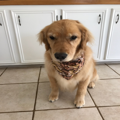

In [103]:
Image.open(image_path + images[4]).convert("RGB").resize((120,120))

In [ ]:
Image.open(image_path + images[3]).convert("RGB").resize((120,120))

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

print('-'*10, 'Gradient Boosting Classifier ', '-'*10)
clf_gb = GradientBoostingClassifier()
clf_gb.fit(train_data_temp, train_labels_raw4)
preds = clf_gb.predict(dev_data_temp)
print ('Gradient Boosting Model accuracy: %3.4f' %clf_gb.score(dev_data_temp, dev_labels_raw4))

---------- Gradient Boosting Classifier  ----------


KeyboardInterrupt: 